<a href="https://colab.research.google.com/github/andrehochuli/teaching/blob/main/AprendizadoMaquina/Avalia%C3%A7%C3%B5esFormativas/Avalia%C3%A7%C3%A3o_Formativa_Classifica%C3%A7%C3%A3o_de_Tumores_Resolu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Avaliação Formativa - Classificação de Tumores

O ICMR (Conselho Indiano de Pesquisa Médica, na sigla em inglês) deseja analisar diferentes tipos de câncer, como câncer de mama, câncer renal, câncer de cólon, câncer de pulmão e câncer de próstata, que se tornaram uma causa de preocupação nos últimos anos. Eles gostariam de identificar a provável causa desses cânceres em termos de genes responsáveis por cada tipo de câncer. Isso nos levaria à identificação precoce de cada tipo de câncer, reduzindo a taxa de fatalidade.

Detalhes do conjunto de dados:
A base de dados de entrada contém 802 amostras para as 802 pessoas que foram detectadas com diferentes tipos de câncer. Cada amostra contém valores de expressão de mais de 20 mil genes. As amostras têm um dos tipos de tumores: BRCA, KIRC, COAD, LUAD e PRAD.

BRCA: mama .
KIRC: renal.
COAD: colon.
LUAD: pulmão. 
PRAD: próstata.

Maiores detalhes podem ser encontrados em [Kaggle ICMR](https://www.kaggle.com/datasets/shibumohapatra/icmr-data)



O trabalho consiste em:

Pré-Processamento dos dados (Converter dados categoricos, normalização, etc)

Análise Exploratória (Analisar desbalanceamentos e distribuição das classes)

Se necessário aplicar técnicas de balanceamento e reducão (PCA)

Treinar os modelos (KNN, NB, DT) e realizar as análises crítitcas

#Importação do Dataset via Kaggle API

In [1]:
! pip install -q kaggle
from google.colab import files

In [2]:
! rm kaggle.json
files.upload()

rm: cannot remove 'kaggle.json': No such file or directory


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"andrehochuli","key":"595ef67c62f59229c7d5395121757cf4"}'}

In [3]:

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download 'shibumohapatra/icmr-data'


 92% 65.0M/70.6M [00:00<00:00, 103MB/s] 
100% 70.6M/70.6M [00:00<00:00, 87.9MB/s]


In [5]:
!ls -lah icmr-data.zip

-rw-r--r-- 1 root root 71M Apr  3 19:27 icmr-data.zip


In [6]:
!unzip icmr-data.zip

Archive:  icmr-data.zip
  inflating: data.csv                
  inflating: labels.csv              


#Preparação dos dados

In [7]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head()


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


## Descrição
20532 features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [9]:
df_labels = pd.read_csv('labels.csv')
df_labels.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [10]:
#Verificando a existência de valores Nan (Data Cleaning)
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [Unnamed: 0, gene_0, gene_1, gene_2, gene_3, gene_4, gene_5, gene_6, gene_7, gene_8, gene_9, gene_10, gene_11, gene_12, gene_13, gene_14, gene_15, gene_16, gene_17, gene_18, gene_19, gene_20, gene_21, gene_22, gene_23, gene_24, gene_25, gene_26, gene_27, gene_28, gene_29, gene_30, gene_31, gene_32, gene_33, gene_34, gene_35, gene_36, gene_37, gene_38, gene_39, gene_40, gene_41, gene_42, gene_43, gene_44, gene_45, gene_46, gene_47, gene_48, gene_49, gene_50, gene_51, gene_52, gene_53, gene_54, gene_55, gene_56, gene_57, gene_58, gene_59, gene_60, gene_61, gene_62, gene_63, gene_64, gene_65, gene_66, gene_67, gene_68, gene_69, gene_70, gene_71, gene_72, gene_73, gene_74, gene_75, gene_76, gene_77, gene_78, gene_79, gene_80, gene_81, gene_82, gene_83, gene_84, gene_85, gene_86, gene_87, gene_88, gene_89, gene_90, gene_91, gene_92, gene_93, gene_94, gene_95, gene_96, gene_97, gene_98, ...]
Index: []

[0 rows x 20532 columns]


##Conversão para Numpy

Eliminamos a coluna 1 pois não é coluna de atributo


In [13]:
X = df.drop(['Unnamed: 0'], axis=1).values
y = df_labels.drop(['Unnamed: 0'], axis=1).values

##Conversão de classes categóricas para númericas

In [14]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

print(f'Amostra: {X[0]}')
print(f'Label da Amostra: {y[0]}')

#Transforma os labels categoricos em númericos
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

unique_classes = np.unique(y)
print(f"Unique Classes: {unique_classes}")

#exibe os valores únicos em formato categórico
unique_categorical = le.inverse_transform(unique_classes)
print(f"Unique Categorical: {unique_categorical}")
print(f'Shape de X {X.shape}')
print(f'Shape de y {y.shape}')
print(f'Amostra: {X[0]}')
print(f'Label da Amostra: {y[0]}')

Amostra: [0.         2.01720929 3.26552691 ... 8.92132623 5.28675919 0.        ]
Label da Amostra: ['PRAD']
Unique Classes: [0 1 2 3 4]
Unique Categorical: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']
Shape de X (801, 20531)
Shape de y (801,)
Amostra: [0.         2.01720929 3.26552691 ... 8.92132623 5.28675919 0.        ]
Label da Amostra: 4


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


#Análise Explorátoria Inicial

Função para visualizar distribuição das classes

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
# gere cores aleatórias para cada barra
cores = np.random.rand(10, 3)
cores = ['red', 'green', 'blue', 'orange', 'purple', 
          'brown']

def plot_class_dist(y,le,title="Distribuição das Classes"):
  # conte o número de ocorrências de cada classe
  classes, contagens = np.unique(y, return_counts=True)

  # mapeie as classes numéricas para as classes categóricas correspondentes
  classes_categoricas = le.inverse_transform(classes)  

  plt.figure(figsize=(4,2))
  # crie um gráfico de barras com a distribuição das classes
  plt.bar(classes_categoricas, contagens,color=cores)

  # adicione rótulos ao gráfico
  plt.title(title)
  plt.xlabel("Classes")
  plt.ylabel("Contagem")

  # exiba o gráfico
  plt.show()



##Pré-processamento


###Normalização dos Dados (0.0 ... 1.0)

In [16]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Normalizando os dados
#MinMax
scaler = MinMaxScaler()

print("   Original: ", X[0])
X = scaler.fit_transform(X)
print("Normalizado: ", X[0])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


   Original:  [0.         2.01720929 3.26552691 ... 8.92132623 5.28675919 0.        ]
Normalizado:  [0.         0.32342445 0.53855624 ... 0.21354593 0.44222065 0.        ]


###Verificando o balanceamento dos dados

Distribuição Total do Dataset


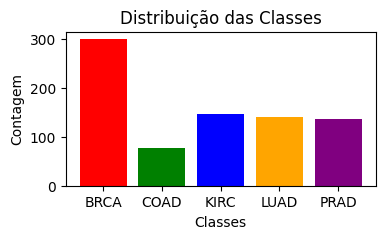

Distribuição Treino


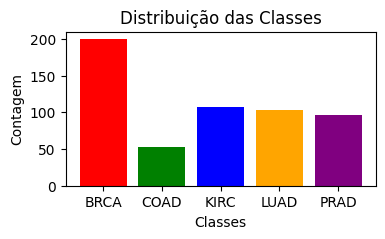

Distribuição Test


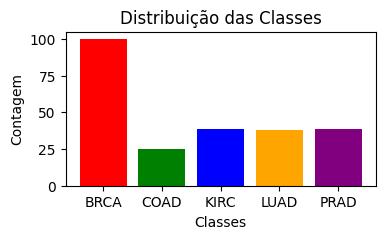

In [17]:
print("Distribuição Total do Dataset")
plot_class_dist(y,le)

print("Distribuição Treino")
plot_class_dist(y_train,le)

print("Distribuição Test")
plot_class_dist(y_test,le)

###Curva de Variância PCA

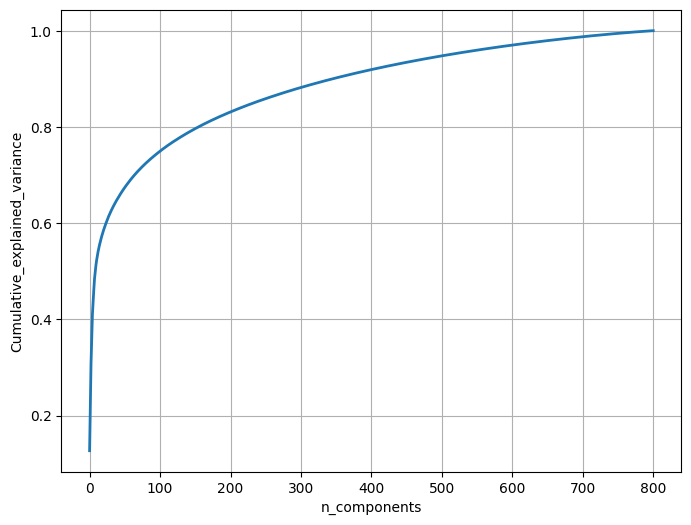

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=min(X.shape))
reduced_data = pca.fit_transform(X)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
                              
plt.figure(figsize=(8, 6))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

###Visualização dos dados

In [19]:
from sklearn.manifold import TSNE
import plotly.graph_objs as go
import plotly.express as px


# Redução de dimensionalidade usando t-SNE para 3 dimensões
tsne = TSNE(n_components=3, random_state=42)
tsne_components = tsne.fit_transform(X)

# Plotando a visualização t-SNE em 3D
fig = px.scatter_3d(x=tsne_components[:, 0], y=tsne_components[:, 1], z=tsne_components[:, 2], color=y)
fig.show()

##Treinando os modelos

In [20]:
knn = KNN()
nb = GaussianNB()
dt = DecisionTreeClassifier()

for model,model_name in zip([knn,nb,dt],['KNN','Naive Bayes','Decision Tree']):
  
  model.fit(X_train, y_train)
  preds = model.predict(X_test)  
  print(model_name,' - ACC: ', accuracy_score(y_test,preds))
  print(classification_report(y_test,preds))  

KNN  - ACC:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        39
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        39

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Naive Bayes  - ACC:  0.6307053941908713
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       100
           1       1.00      0.24      0.39        25
           2       0.43      0.87      0.58        39
           3       0.50      0.37      0.42        38
           4       0.86      0.49      0.62        39

    accuracy                           0.63       241
   macro avg       0.71      0.55      0.56       241
weighted avg       0

#Análise sobre Redução de Features

In [21]:
knn = KNN()
nb = GaussianNB()
dt = DecisionTreeClassifier()
preds_models = [[],[],[]]
pca_features = [2,10,50,100,200,400,800]
for n_comp in pca_features:
  pca = PCA(n_components=n_comp)
  reduced_data = pca.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(reduced_data, y, test_size=0.3, random_state=0)
  print(f"#####Acuracias para PCA={n_comp}####")
  i=0
  
  for model,model_name in zip([knn,nb,dt],['KNN','Naiva Bayes','Decision Tree']):
  
    model.fit(X_train, y_train)
    preds = model.predict(X_test)  
    acc = accuracy_score(y_test,preds)
    preds_models[i].append(acc)
    print(f'{model_name}, acc: {acc}')
    i+=1
    #print(classification_report(y_test,preds))
  
  print("#############################")


#Sem redução de Featuares
n_comp=X.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"#####Acuracias para {n_comp} features (Sem reducao por PCA) ####")
i=0

for model,model_name in zip([knn,nb,dt],['KNN','Naiva Bayes','Decision Tree']):

  model.fit(X_train, y_train)
  preds = model.predict(X_test)  
  acc = accuracy_score(y_test,preds)
  #preds_models[i].append(acc)
  print(f'{model_name}, acc: {acc}')
  i+=1
  #print(classification_report(y_test,preds))

print("#############################")



#####Acuracias para PCA=2####
KNN, acc: 0.9336099585062241
Naiva Bayes, acc: 0.9128630705394191
Decision Tree, acc: 0.9004149377593361
#############################
#####Acuracias para PCA=10####
KNN, acc: 1.0
Naiva Bayes, acc: 0.979253112033195
Decision Tree, acc: 0.946058091286307
#############################
#####Acuracias para PCA=50####
KNN, acc: 1.0
Naiva Bayes, acc: 0.970954356846473
Decision Tree, acc: 0.9294605809128631
#############################
#####Acuracias para PCA=100####
KNN, acc: 1.0
Naiva Bayes, acc: 0.966804979253112
Decision Tree, acc: 0.9377593360995851
#############################
#####Acuracias para PCA=200####
KNN, acc: 1.0
Naiva Bayes, acc: 0.8796680497925311
Decision Tree, acc: 0.9377593360995851
#############################
#####Acuracias para PCA=400####
KNN, acc: 1.0
Naiva Bayes, acc: 0.7759336099585062
Decision Tree, acc: 0.921161825726141
#############################
#####Acuracias para PCA=800####
KNN, acc: 1.0
Naiva Bayes, acc: 0.5394190871369294

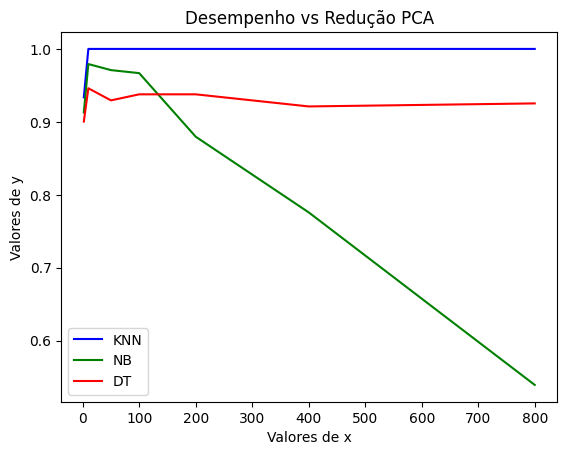

In [22]:
plt.plot(pca_features, preds_models[0], label='KNN', color='blue')
plt.plot(pca_features, preds_models[1], label='NB', color='green')
plt.plot(pca_features, preds_models[2], label='DT', color='red')
plt.title('Desempenho vs Redução PCA')
plt.xlabel('Valores de x')
plt.ylabel('Valores de y')
plt.legend()
plt.show()

##Análise Desbalanceamento vs Naive Bayes

(array([0, 1, 2, 3, 4]), array([300,  78, 146, 141, 136]))
(20531,)
[0.         0.5438683  0.34360077 0.25211079 0.43035361 0.
 0.70615982 0.46933208 0.         0.        ]
Train Accuracy:  1.0
Test Accuracy:  0.6265560165975104
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        85
           1       0.29      1.00      0.44         8
           2       0.78      0.42      0.54        77
           3       0.65      0.59      0.62        44
           4       0.57      0.89      0.70        27

    accuracy                           0.63       241
   macro avg       0.59      0.72      0.60       241
weighted avg       0.68      0.63      0.62       241



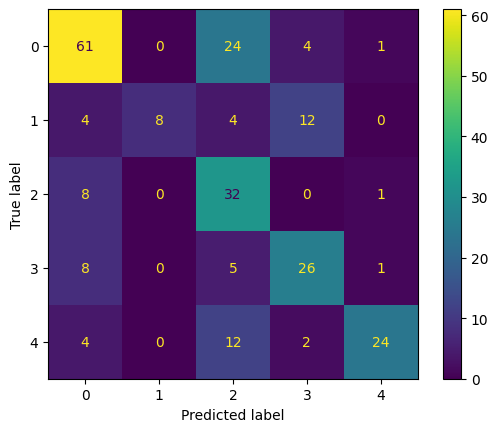

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(np.unique(y,return_counts=True))


# Build a Classifier
model = GaussianNB()
#model = DecisionTreeClassifier()
#model = KNeighborsClassifier()

print(X_train[0].shape)
print(X_train[0][:10])
model = model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print("Train Accuracy: ", accuracy_score(y_pred,y_train))

y_pred = model.predict(X_test)    
print("Test Accuracy: ", accuracy_score(y_pred,y_test))


report = classification_report(y_pred, y_test)
print(report)

labels = [0,1,2,3,4]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();



#Balanceamento dos dados
## Undersampling

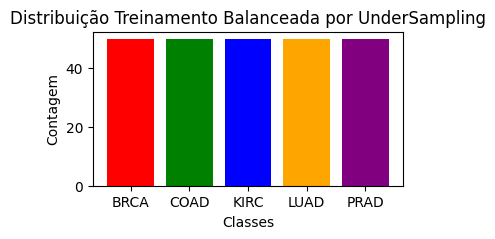

Train Accuracy:  1.0


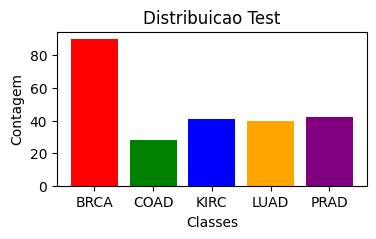

Test Accuracy:  0.7427385892116183
              precision    recall  f1-score   support

           0       0.50      0.94      0.65        48
           1       0.96      0.79      0.87        34
           2       0.85      0.71      0.78        49
           3       0.75      0.56      0.64        54
           4       1.00      0.75      0.86        56

    accuracy                           0.74       241
   macro avg       0.81      0.75      0.76       241
weighted avg       0.81      0.74      0.75       241



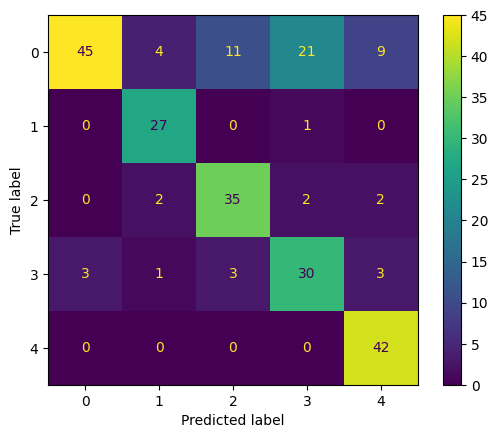

In [25]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, ADASYN,RandomOverSampler)

sampler = RandomUnderSampler(random_state=42)
X_bal, y_bal = sampler.fit_resample(X_train, y_train)
counts = np.unique(y_bal,return_counts=True)

model = GaussianNB()
model.fit(X_bal, y_bal)

y_pred = model.predict(X_bal)

plot_class_dist(y_bal,le,title="Distribuição Treinamento Balanceada por UnderSampling")

print("Train Accuracy: ", accuracy_score(y_pred,y_bal))

y_pred = model.predict(X_test)    
plot_class_dist(y_test,le,title="Distribuição Teste")
print("Test Accuracy: ", accuracy_score(y_pred,y_test))


report = classification_report(y_pred, y_test)
print(report)

labels = [0,1,2,3,4]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();


#Oversampling Interpolação (SMOTE)

(560, 20531)
(1050, 20531)


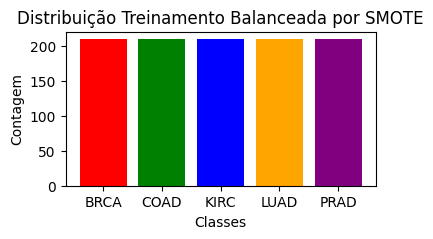

Train Accuracy:  0.9990476190476191


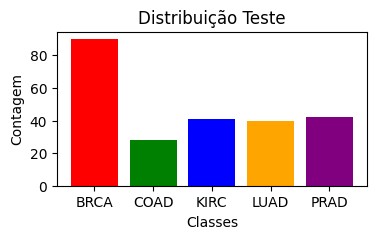

Test Accuracy:  0.6265560165975104
              precision    recall  f1-score   support

           0       0.68      0.72      0.70        85
           1       0.29      1.00      0.44         8
           2       0.78      0.42      0.54        77
           3       0.65      0.59      0.62        44
           4       0.57      0.89      0.70        27

    accuracy                           0.63       241
   macro avg       0.59      0.72      0.60       241
weighted avg       0.68      0.63      0.62       241



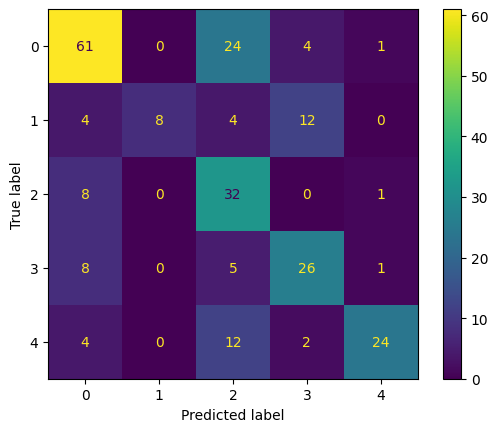

In [29]:
sampler = SMOTE(random_state=42)
print(X_train.shape)
X_bal, y_bal = sampler.fit_resample(X_train, y_train)
print(X_bal.shape)
counts = np.unique(y_bal,return_counts=True)

model = GaussianNB()
model.fit(X_bal, y_bal)
y_pred = model.predict(X_bal)

plot_class_dist(y_bal,le,title="Distribuição Treinamento Balanceada por SMOTE")
print("Train Accuracy: ", accuracy_score(y_pred,y_bal))

plot_class_dist(y_test,le,title="Distribuição Teste")
y_pred = model.predict(X_test)    
print("Test Accuracy: ", accuracy_score(y_pred,y_test))


report = classification_report(y_pred, y_test)
print(report)

labels = [0,1,2,3,4]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();
